# Primera Parte -->  Off - line

1. DataSet
2. Inferir Fx Costo
3. Simunlar el modelo (varios tipos de lerners)
4. Evaluar los lerners
5. Obtener el modelo

In [1]:
import pandas as pd

### Extracción de Datos

In [2]:
df=pd.read_csv('simdos.csv')
df.head()

,Unnamed: 0,user_id,af0,cycle,educ,gender,age,activity_id,af1,af2,dificulty,topic,prob,run_number
0,0,1,51,1,4,1,51,201,51,84,1,2,0.33,1
1,1,1,51,2,4,1,51,86,50,53,2,3,0.33,1
2,2,1,51,3,4,1,51,136,57,60,3,3,0.33,1
3,3,1,51,4,4,1,51,159,55,64,1,1,0.33,1
4,4,1,51,5,4,1,51,173,52,59,3,2,0.33,1


In [3]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df['cost'] =  df['af1'] - df['af2'] 
df.drop(columns=['af2','user_id','run_number','prob'], axis=1, inplace=True)


In [4]:
df.head()

,af0,cycle,educ,gender,age,activity_id,af1,dificulty,topic,cost
0,51,1,4,1,51,201,51,1,2,-33
1,51,2,4,1,51,86,50,2,3,-3
2,51,3,4,1,51,136,57,3,3,-3
3,51,4,4,1,51,159,55,1,1,-9
4,51,5,4,1,51,173,52,3,2,-7


In [5]:
df['educ'].unique()

array([4, 2, 1, 5, 3], dtype=int64)

In [6]:
df.to_csv('sim2detec')

In [7]:
train_df = df[df.index < 70000]
test_df = df[df.index >= 70000]
test_df.reset_index

<bound method DataFrame.reset_index of        af0  cycle  educ  gender  age  activity_id  af1  dificulty  topic  cost
70000   48      1     5       0   45           42   52          2      3    -7
70001   48      2     5       0   45           20   49          3      2    -2
70002   48      3     5       0   45          144   49          4      3    -3
70003   48      4     5       0   45          167   48          5      3    -4
70004   48      5     5       0   45           37   46          5      3    -1
...    ...    ...   ...     ...  ...          ...  ...        ...    ...   ...
99995   50     16     4       0   38           57   52          5      2    -1
99996   50     17     4       0   38           76   47          4      2    -9
99997   50     18     4       0   38          240   54          5      3     4
99998   50     19     4       0   38          156   45          3      2   -12
99999   50     20     4       0   38          128   45          4      3    -9

[30000 rows 

### Modelo para determinar la Función de Costo

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [9]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def train_xgboost_regressor(train_data, train_labels, test_data, test_labels):
    # Define the XGBoost regressor
    reg = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        max_depth=4,
        learning_rate=0.18793869,
        gamma=0.03805912,
        min_child_weight=4.9259686,
        subsample=0.89705926,
        colsample_bytree=0.9011847,
        seed=42
    )

    # Train the XGBoost model
    reg.fit(train_data, train_labels)

    # Evaluate the model on the test data
    predictions = reg.predict(test_data)
    mse = mean_squared_error(test_labels, predictions)

    # Return the trained model and the mean squared error
    return reg, mse
     

In [10]:


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_train=train_df.drop(columns=['cost','activity_id'], axis=1, inplace=False)
y_train=train_df['cost']

X_test=test_df.drop(columns=['cost', 'activity_id'], axis=1, inplace=False)
y_test=test_df['cost']


# Train an XGBoost regressor on the data
model, mse = train_xgboost_regressor(X_train, y_train, X_test, y_test)

# Print the MSE
print('MSE:', mse)
     

MSE: 52.585888564480264


In [11]:
X_train.head()

,af0,cycle,educ,gender,age,af1,dificulty,topic
0,51,1,4,1,51,51,1,2
1,51,2,4,1,51,50,2,3
2,51,3,4,1,51,57,3,3
3,51,4,4,1,51,55,1,1
4,51,5,4,1,51,52,3,2


In [12]:
def get_cost(af0, cycle, educ, gender, age, af1, dificulty, topic, model):
    
    usuario=pd.DataFrame({'af0':af0, 'cycle':cycle, 'educ':educ, 'gender':gender, 'age':age, 'af1':af1, 'dificulty':dificulty, 'topic':topic}, index=[1])
   
  
    
    costo=model.predict(usuario)
    
    return costo

### Generar Lerners

In [13]:
df2=pd.read_csv('simdos.csv')
df2.drop(columns=['Unnamed: 0','af2','run_number'], axis=1, inplace=True)

In [14]:
train_df2 = df2[df2.index >= 30001]
train_df2.reset_index
test_df2 = df2[df2.index < 30000]
test_df2.reset_index

<bound method DataFrame.reset_index of        user_id  af0  cycle  educ  gender  age  activity_id  af1  dificulty  \
0            1   51      1     4       1   51          201   51          1   
1            1   51      2     4       1   51           86   50          2   
2            1   51      3     4       1   51          136   57          3   
3            1   51      4     4       1   51          159   55          1   
4            1   51      5     4       1   51          173   52          3   
...        ...  ...    ...   ...     ...  ...          ...  ...        ...   
29995     1500   42     16     2       0   36           26   44          5   
29996     1500   42     17     2       0   36           68   44          3   
29997     1500   42     18     2       0   36          144   40          1   
29998     1500   42     19     2       0   36           77   39          5   
29999     1500   42     20     2       0   36          111   41          5   

       topic  prob  
0  

In [15]:
import vowpalwabbit



In [16]:
import random
import matplotlib.pyplot as plt

In [17]:
def run_simulation(vw, num_iterations, label):
    cost_sum = 0.0
    # das= del Alemán, artículo neutro traducido como "lo". En este caso "lo" es igual al costo acumulado promedio
    das = []
  
    
    
    for i in range(1, num_iterations + 1):
        datos_vw=[]
        
        
        tema=[1,2,3]
        sexo=[0,1]
        age = str((random.uniform(20,61)))
        gender=str(random.choice(sexo))
        af0=str(int(random.uniform(0,101)))
        af1=str(int(random.uniform(0,101)))
        cycle=str(int(random.uniform(1,21)))
        educ=str(int(random.uniform(1,6)))
        topic=str(random.choice(tema))
    
        contextos=[age,gender,af0,af1,cycle,educ,topic]
        contextos_vw=':'.join([f'{contexto}' for contexto in contextos])
    
        dificultad=[1,2,3,4,5]
        dificulty = str(random.choice(dificultad))
        cost = get_cost(int(af0), int(cycle), int(educ), int(gender), int(float(age)), int(af1), int(dificulty), int(topic), model)
        cost_sum += float(cost)
        prob = str(0.33)
    
        etiquetas = [dificulty, str(cost), prob]
        etiquetas_vw = ':'.join([f'{etiqueta}' for etiqueta in etiquetas])
        
          
        if label:
            datos_vw.append(f'{etiquetas_vw} | {contextos_vw}')
            vw_format=vw.parse(datos_vw,vowpalwabbit.LabelType.CONTEXTUAL_BANDIT)
            vw.learn(vw_format)
        else:
            datos_vw.append(f'| {contextos_vw}')
            #predict?
        
        
        
        #print(cost_sum)
        das.append(-1 * cost_sum / i)
        
    return das    
        

In [18]:
def plot_das(num_iterations, das):
    plt.plot(range(1, num_iterations + 1), das)
    plt.xlabel("num_iterations", fontsize=14)
    plt.ylabel("das", fontsize=14)
 

In [43]:
num_iterations=1500

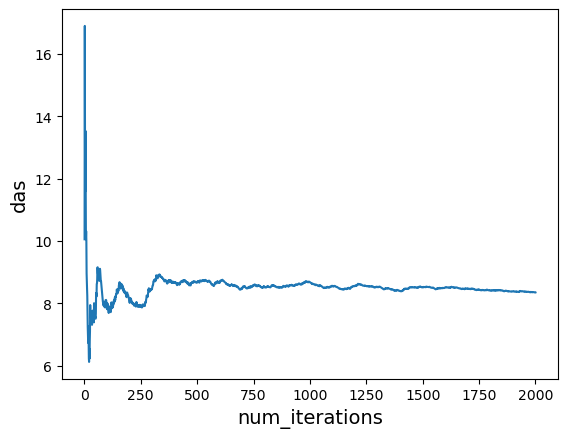

In [61]:
vw_extra = vw2 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 600")
das_extra = run_simulation(vw_extra, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das_extra)

In [23]:
vw1 = vowpalwabbit.Workspace("--cb_explore 5 --quiet")
vw2 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 1")
vw3 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 2")
vw4 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --epsilon 0.1")
vw5 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --epsilon 0.2")
vw6 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --bag 3")
vw7 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --bag 5")
vw8 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --cover 2")
vw9 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --cover 6")

In [25]:
das1 = run_simulation(vw1,num_iterations, label=True)
das2 = run_simulation(vw2,num_iterations, label=True)
das3 = run_simulation(vw3,num_iterations, label=True)
das4 = run_simulation(vw4,num_iterations, label=True)
das5 = run_simulation(vw5,num_iterations, label=True)
das6 = run_simulation(vw6,num_iterations, label=True)


In [26]:
das7 = run_simulation(vw7,num_iterations, label=True)
das8 = run_simulation(vw8,num_iterations, label=True)
das9 = run_simulation(vw9,num_iterations, label=True)

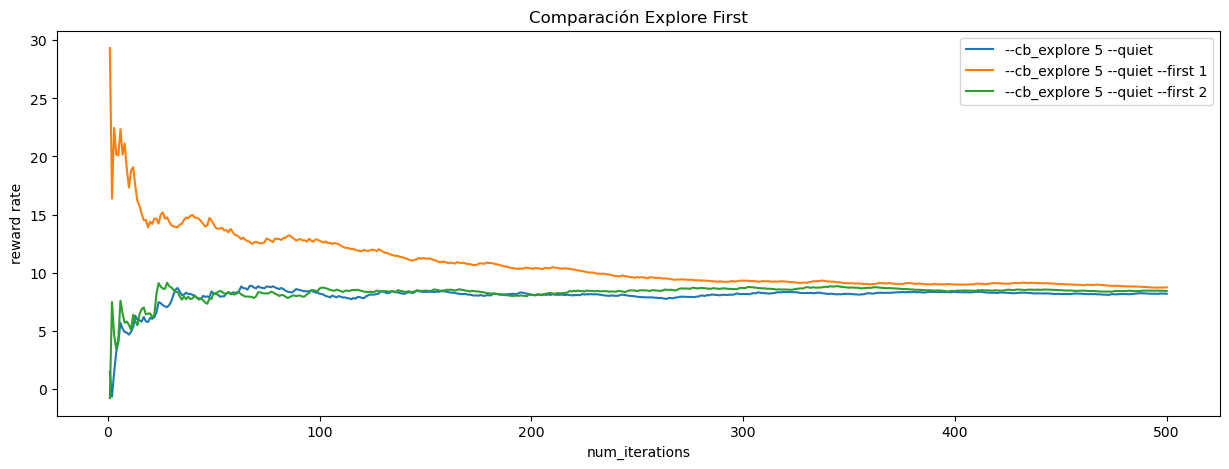

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das1, label='--cb_explore 5 --quiet')  
ax.plot(range(1, num_iterations + 1), das2, label='--cb_explore 5 --quiet --first 1')
ax.plot(range(1, num_iterations + 1), das3, label='--cb_explore 5 --quiet --first 2')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación Explore First") 
ax.legend()

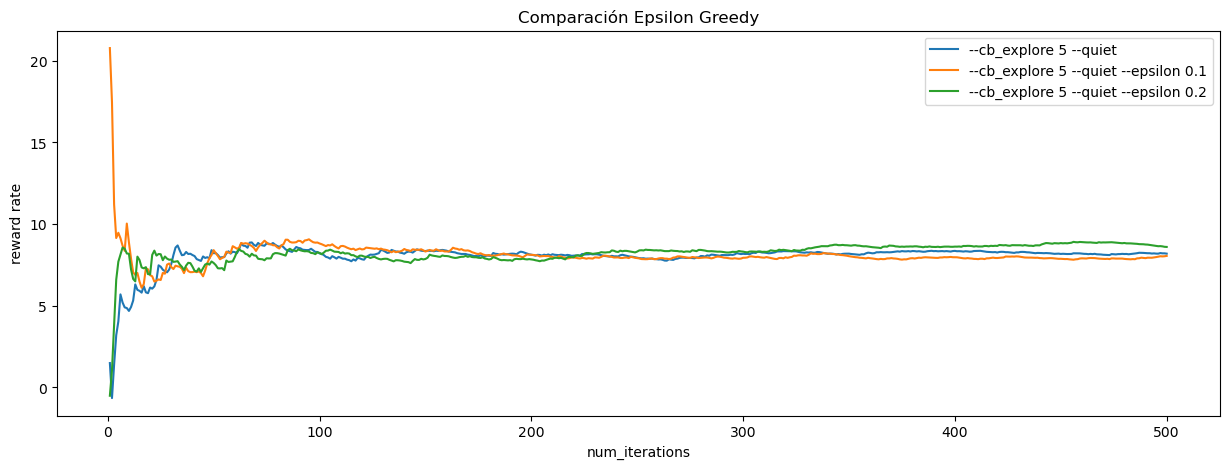

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das1, label='--cb_explore 5 --quiet')  
ax.plot(range(1, num_iterations + 1), das4, label='--cb_explore 5 --quiet --epsilon 0.1')
ax.plot(range(1, num_iterations + 1), das5, label='--cb_explore 5 --quiet --epsilon 0.2')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación Epsilon Greedy") 
ax.legend()

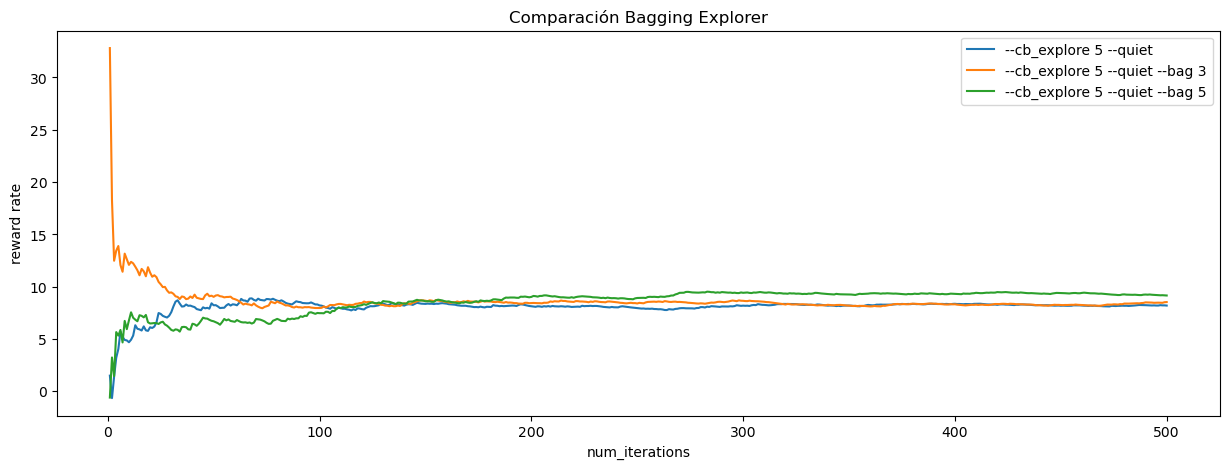

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das1, label='--cb_explore 5 --quiet')  
ax.plot(range(1, num_iterations + 1), das6, label='--cb_explore 5 --quiet --bag 3')
ax.plot(range(1, num_iterations + 1), das7, label='--cb_explore 5 --quiet --bag 5')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación Bagging Explorer") 
ax.legend()

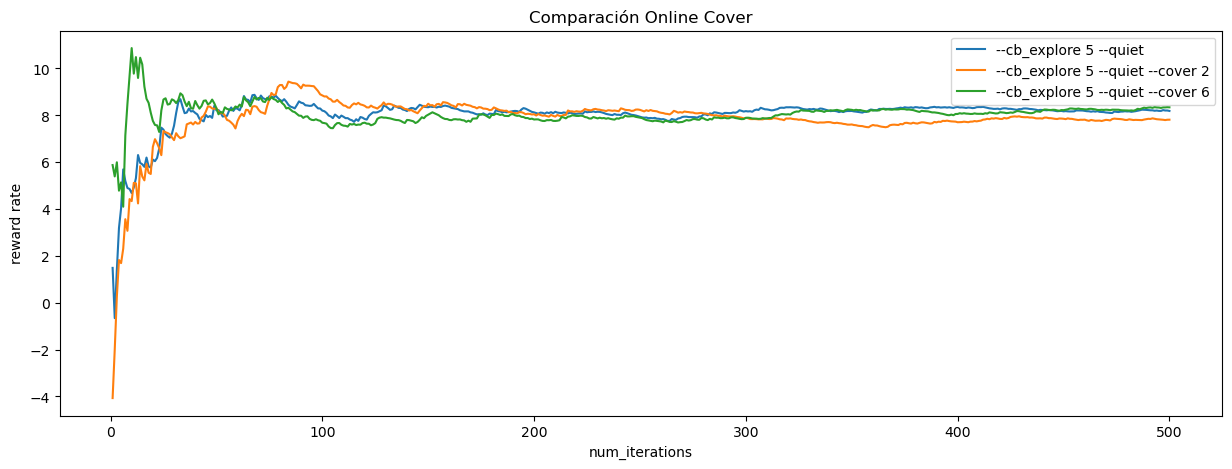

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das1, label='--cb_explore 5 --quiet')  
ax.plot(range(1, num_iterations + 1), das8, label='--cb_explore 5 --quiet --cover 2')
ax.plot(range(1, num_iterations + 1), das9, label='--cb_explore 5 --quiet --cover 6')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación Online Cover") 
ax.legend()

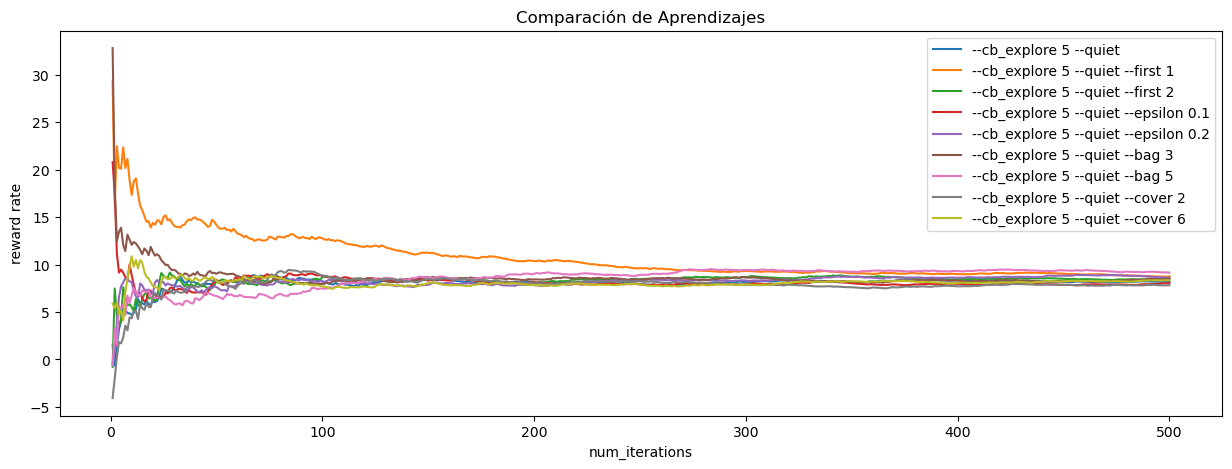

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das1, label='--cb_explore 5 --quiet')  
ax.plot(range(1, num_iterations + 1), das2, label='--cb_explore 5 --quiet --first 1')
ax.plot(range(1, num_iterations + 1), das3, label='--cb_explore 5 --quiet --first 2')
ax.plot(range(1, num_iterations + 1), das4, label='--cb_explore 5 --quiet --epsilon 0.1')
ax.plot(range(1, num_iterations + 1), das5, label='--cb_explore 5 --quiet --epsilon 0.2')
ax.plot(range(1, num_iterations + 1), das6, label='--cb_explore 5 --quiet --bag 3')
ax.plot(range(1, num_iterations + 1), das7, label='--cb_explore 5 --quiet --bag 5')
ax.plot(range(1, num_iterations + 1), das8, label='--cb_explore 5 --quiet --cover 2')
ax.plot(range(1, num_iterations + 1), das9, label='--cb_explore 5 --quiet --cover 6')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación de Aprendizajes") 
ax.legend()

In [38]:
das11 = run_simulation(vw1,num_iterations, label=True)
das22 = run_simulation(vw2,num_iterations, label=True)
das32 = run_simulation(vw3,num_iterations, label=True)
das42 = run_simulation(vw4,num_iterations, label=True)
das52 = run_simulation(vw5,num_iterations, label=True)
das62 = run_simulation(vw6,num_iterations, label=True)

In [39]:
das72 = run_simulation(vw7,num_iterations, label=True)
das82 = run_simulation(vw8,num_iterations, label=True)
das92 = run_simulation(vw9,num_iterations, label=True)

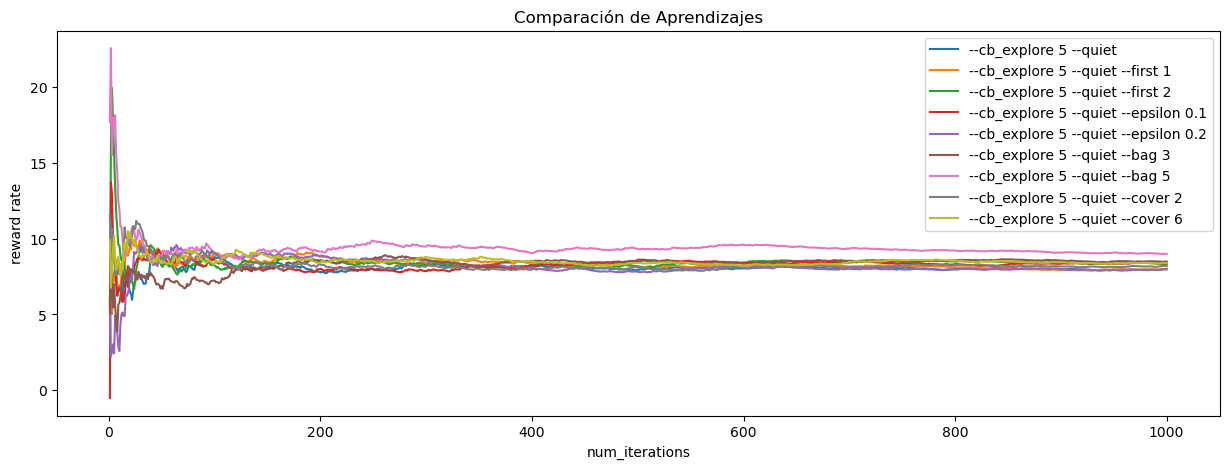

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das11, label='--cb_explore 5 --quiet')  
ax.plot(range(1, num_iterations + 1), das22, label='--cb_explore 5 --quiet --first 1')
ax.plot(range(1, num_iterations + 1), das32, label='--cb_explore 5 --quiet --first 2')
ax.plot(range(1, num_iterations + 1), das42, label='--cb_explore 5 --quiet --epsilon 0.1')
ax.plot(range(1, num_iterations + 1), das52, label='--cb_explore 5 --quiet --epsilon 0.2')
ax.plot(range(1, num_iterations + 1), das62, label='--cb_explore 5 --quiet --bag 3')
ax.plot(range(1, num_iterations + 1), das72, label='--cb_explore 5 --quiet --bag 5')
ax.plot(range(1, num_iterations + 1), das82, label='--cb_explore 5 --quiet --cover 2')
ax.plot(range(1, num_iterations + 1), das92, label='--cb_explore 5 --quiet --cover 6')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación de Aprendizajes") 
ax.legend()

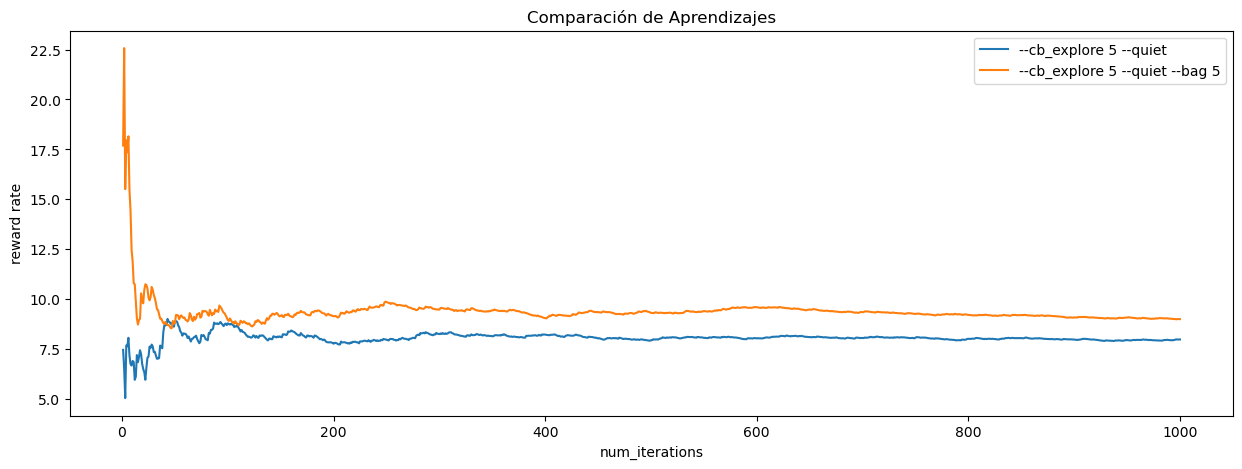

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das11, label='--cb_explore 5 --quiet')  
#ax.plot(range(1, num_iterations + 1), das22, label='--cb_explore 5 --quiet --first 1')
#ax.plot(range(1, num_iterations + 1), das32, label='--cb_explore 5 --quiet --first 2')
#ax.plot(range(1, num_iterations + 1), das42, label='--cb_explore 5 --quiet --epsilon 0.1')
#ax.plot(range(1, num_iterations + 1), das52, label='--cb_explore 5 --quiet --epsilon 0.2')
#ax.plot(range(1, num_iterations + 1), das62, label='--cb_explore 5 --quiet --bag 3')
ax.plot(range(1, num_iterations + 1), das72, label='--cb_explore 5 --quiet --bag 5')
#ax.plot(range(1, num_iterations + 1), das82, label='--cb_explore 5 --quiet --cover 2')
#ax.plot(range(1, num_iterations + 1), das92, label='--cb_explore 5 --quiet --cover 6')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación de Aprendizajes") 
ax.legend()

In [44]:
das13 = run_simulation(vw1,num_iterations, label=True)
das23 = run_simulation(vw2,num_iterations, label=True)
das33 = run_simulation(vw3,num_iterations, label=True)
das43 = run_simulation(vw4,num_iterations, label=True)
das53 = run_simulation(vw5,num_iterations, label=True)
das63 = run_simulation(vw6,num_iterations, label=True)

In [45]:
das73 = run_simulation(vw7,num_iterations, label=True)
das83 = run_simulation(vw8,num_iterations, label=True)
das93 = run_simulation(vw9,num_iterations, label=True)

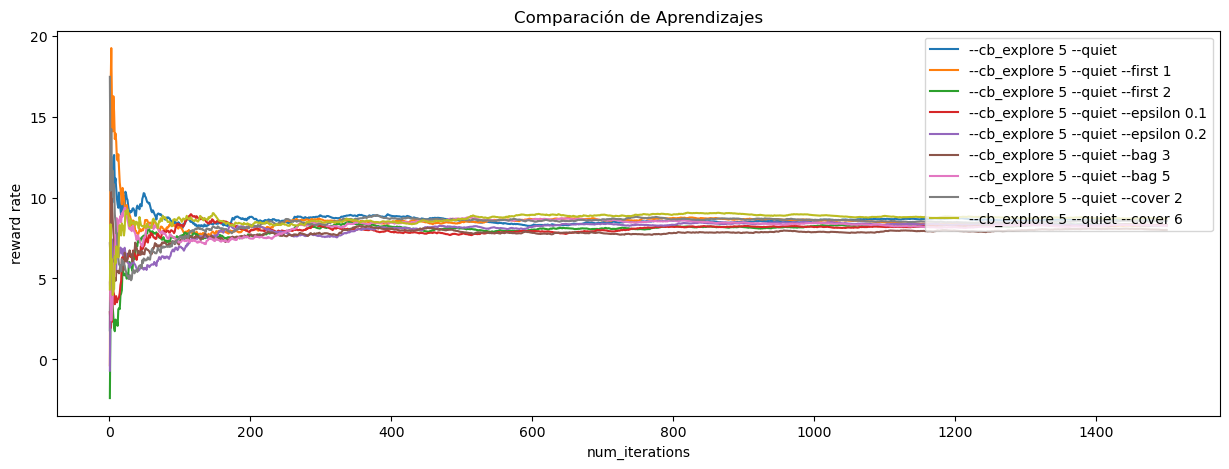

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das13, label='--cb_explore 5 --quiet')  
ax.plot(range(1, num_iterations + 1), das23, label='--cb_explore 5 --quiet --first 1')
ax.plot(range(1, num_iterations + 1), das33, label='--cb_explore 5 --quiet --first 2')
ax.plot(range(1, num_iterations + 1), das43, label='--cb_explore 5 --quiet --epsilon 0.1')
ax.plot(range(1, num_iterations + 1), das53, label='--cb_explore 5 --quiet --epsilon 0.2')
ax.plot(range(1, num_iterations + 1), das63, label='--cb_explore 5 --quiet --bag 3')
ax.plot(range(1, num_iterations + 1), das73, label='--cb_explore 5 --quiet --bag 5')
ax.plot(range(1, num_iterations + 1), das83, label='--cb_explore 5 --quiet --cover 2')
ax.plot(range(1, num_iterations + 1), das93, label='--cb_explore 5 --quiet --cover 6')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación de Aprendizajes") 
ax.legend(loc=1)

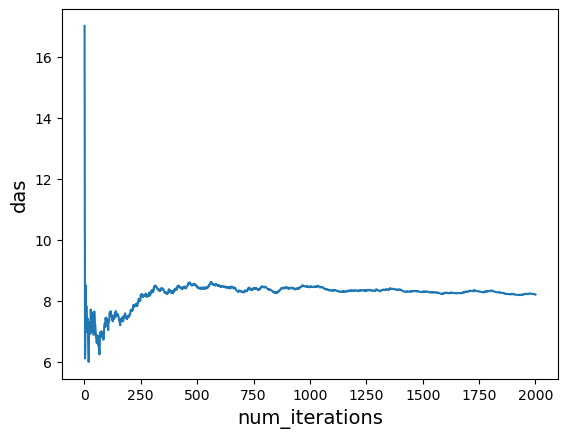

In [42]:
num_iterations=15000
vw_mas = vowpalwabbit.Workspace("--cb_explore 5 --quiet --cover 6")
vw_mas1 = vowpalwabbit.Workspace("--cb_explore 5 --quiet")
das_mas = run_simulation(vw_mas, num_iterations, label=True)
das_mas1 = run_simulation(vw_mas1, num_iterations, label=True)

fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(range(1, num_iterations + 1), das_sin_aprend, label='sin aprendizaje')  
ax.plot(range(1, num_iterations + 1), das_mas1, label='--cb_explore 5 --quiet')  
#ax.plot(range(1, num_iterations + 1), das23, label='--cb_explore 5 --quiet --first 1')
#ax.plot(range(1, num_iterations + 1), das33, label='--cb_explore 5 --quiet --first 2')
#ax.plot(range(1, num_iterations + 1), das43, label='--cb_explore 5 --quiet --epsilon 0.1')
#ax.plot(range(1, num_iterations + 1), das53, label='--cb_explore 5 --quiet --epsilon 0.2')
#ax.plot(range(1, num_iterations + 1), das63, label='--cb_explore 5 --quiet --bag 3')
#ax.plot(range(1, num_iterations + 1), das73, label='--cb_explore 5 --quiet --bag 5')
#ax.plot(range(1, num_iterations + 1), das83, label='--cb_explore 5 --quiet --cover 2')
ax.plot(range(1, num_iterations + 1), das_mas, label='--cb_explore 5 --quiet --cover 6')
ax.set_xlabel('num_iterations')
ax.set_ylabel('reward rate')  
ax.set_title("Comparación de Aprendizajes") 
ax.legend(loc=1)


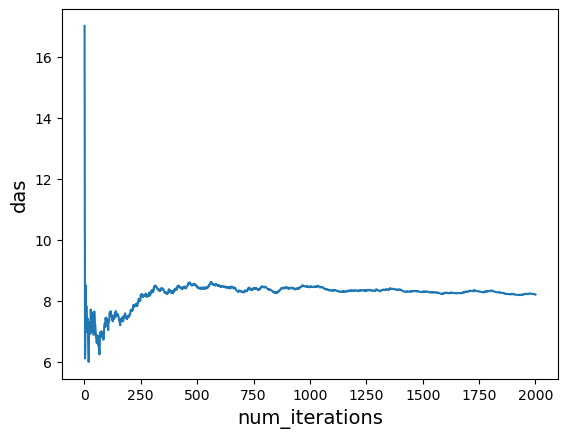

In [43]:
vw3 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 2")
num_iterations=2000
das3 = run_simulation(vw3, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

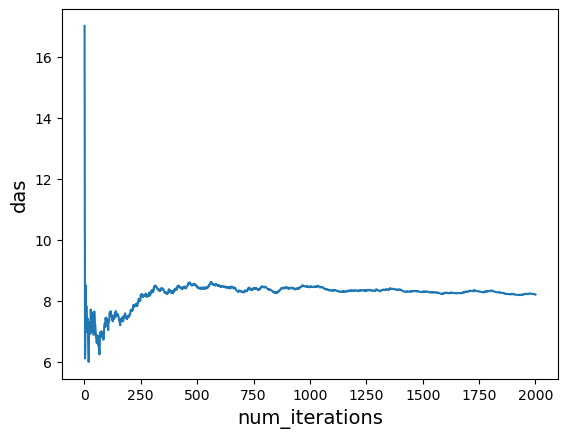

In [44]:
vw4 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --first 3")
num_iterations=2000
das4 = run_simulation(vw3, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

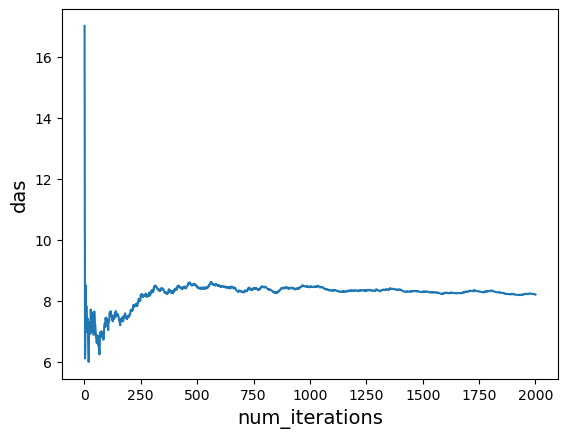

In [45]:
vw5 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --epsilon 0.1")
num_iterations=2000
das5 = run_simulation(vw2, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

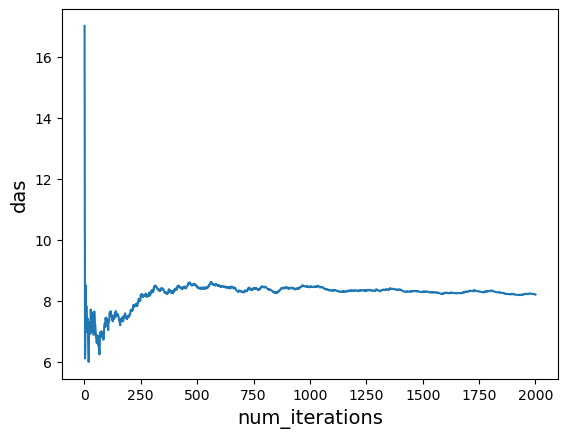

In [53]:
vw6 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --epsilon 0.2")
num_iterations=2000
das6 = run_simulation(vw2, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

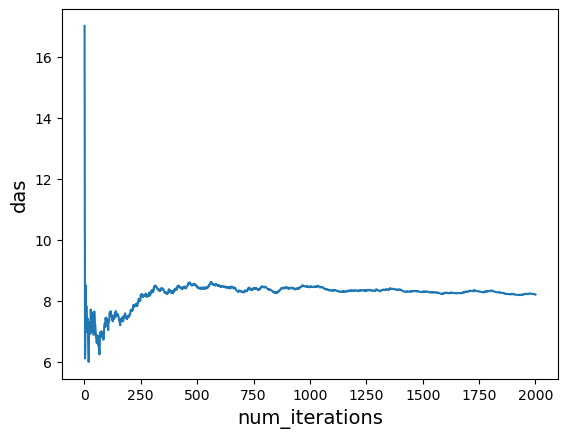

In [54]:
vw6a = vowpalwabbit.Workspace("--cb_explore 5 --quiet --bag 3")
num_iterations=2000
das6a = run_simulation(vw2, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

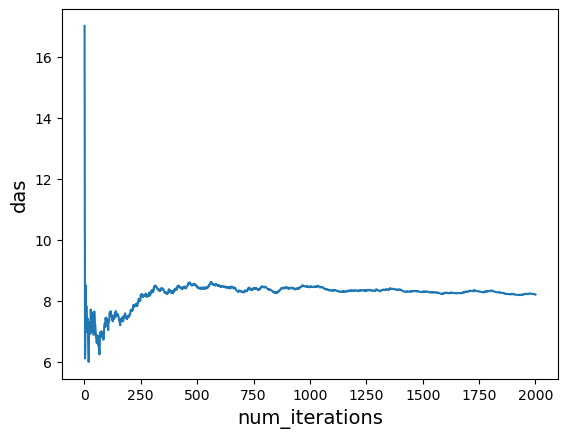

In [47]:
vw7 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --bag 5")
num_iterations=2000
das7 = run_simulation(vw2, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

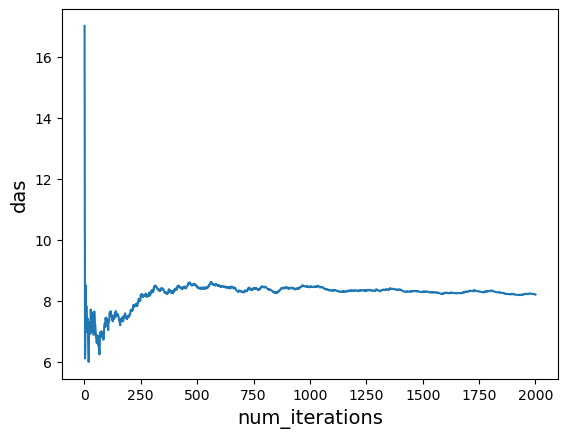

In [48]:
vw8 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --cover 2")
num_iterations=2000
das8 = run_simulation(vw2, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

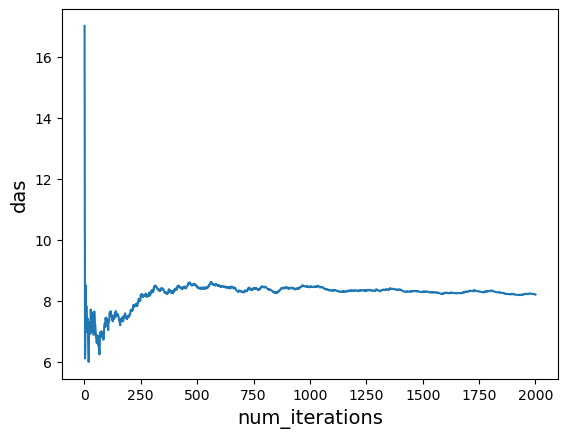

In [49]:
vw9 = vowpalwabbit.Workspace("--cb_explore 5 --quiet --cover 6")
num_iterations=2000
das9 = run_simulation(vw2, num_iterations, label=True)

#print(das)
plot_das(num_iterations, das)

In [55]:
def run_simulation_sin_aprend( num_iterations):
    cost_sum = 0.0
    # das= del Alemán, artículo neutro traducido como "lo". En este caso "lo" es igual al costo acumulado promedio
    das = []
  
    
    
    for i in range(1, num_iterations + 1):
        datos_vw=[]
        
        
        tema=[1,2,3]
        sexo=[0,1]
        age = str((random.uniform(20,61)))
        gender=str(random.choice(sexo))
        af0=str(int(random.uniform(0,101)))
        af1=str(int(random.uniform(0,101)))
        cycle=str(int(random.uniform(1,21)))
        educ=str(int(random.uniform(1,6)))
        topic=str(random.choice(tema))
    
        contextos=[age,gender,af0,af1,cycle,educ,topic]
        contextos_vw=':'.join([f'{contexto}' for contexto in contextos])
    
        dificultad=[1,2,3,4,5]
        dificulty = str(random.choice(dificultad))
        cost = get_cost(int(af0), int(cycle), int(educ), int(gender), int(float(age)), int(af1), int(dificulty), int(topic), model)
        cost_sum += float(cost)
        prob = str(0.33)
    
             
          
               
        
        #print(cost_sum)
        das.append(-1 * cost_sum / i)
        
    return das    

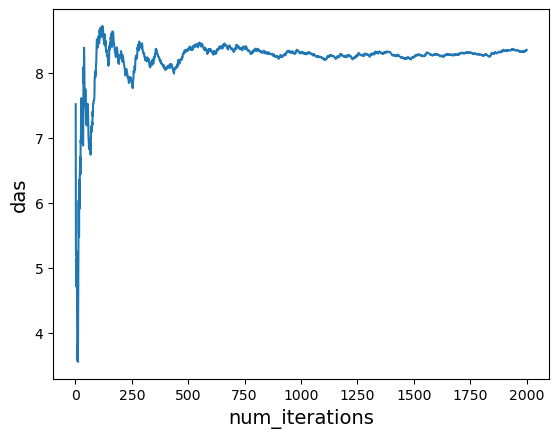

In [58]:

num_iterations=2000
das_sin_aprend = run_simulation_sin_aprend( num_iterations)

#print(das)
plot_das(num_iterations, das_sin_aprend)